#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 04
**CH04A Management quality and firm size: describing patterns of association**

using the wms-management-survey dataset

version 1.0 2021-05-05

In [1]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/wms-management-survey/clean/"
data_out = dirname + "da_case_studies/ch04-management-firm-size/"
output = dirname + "da_case_studies/ch04-management-firm-size/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


from py_helper_functions import *


In [2]:
import warnings

warnings.filterwarnings("ignore")


In [3]:
# Import data
df = pd.read_csv(data_in + "wms_da_textbook.csv")


In [4]:
# Sample selection
df = df.loc[
    lambda x: (x["country"] == "Mexico")
    & (x["wave"] == 2013)
    & (x["emp_firm"] >= 100)
    & (x["emp_firm"] <= 5000)
]


In [5]:
df.emp_firm.describe()


count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

In [6]:
# Save workfile
df.to_csv(data_out + "ch04-wms-work.csv", index=False)
# Summary
df.loc[:, ["management", "emp_firm"]].describe()


,management,emp_firm
count,300.000000,300.000000
mean,2.938519,761.140000
std,0.601059,977.035685
min,1.277778,100.000000
25%,2.555556,200.000000
50%,2.944444,353.000000
75%,3.277778,900.000000
max,4.611111,5000.000000


### Figure 4.1 Distribution of the management score variable

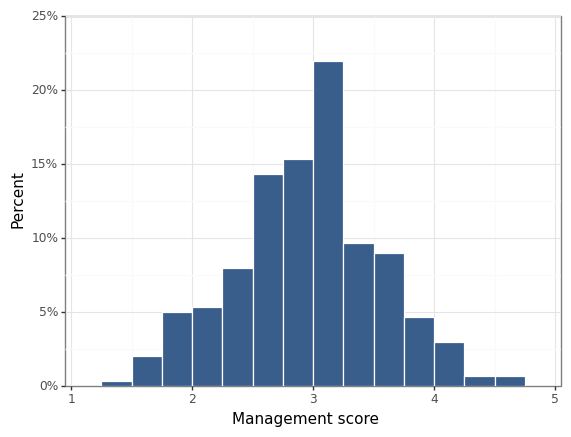

<ggplot: (673925810)>

In [7]:
(
    ggplot(df, aes(x="management"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        fill=color[0],
        color="white",
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Management score", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.25),
        breaks=seq(0, 0.26, by=0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


### Figure 4.2 The distribution of employment

(a) Number of employees

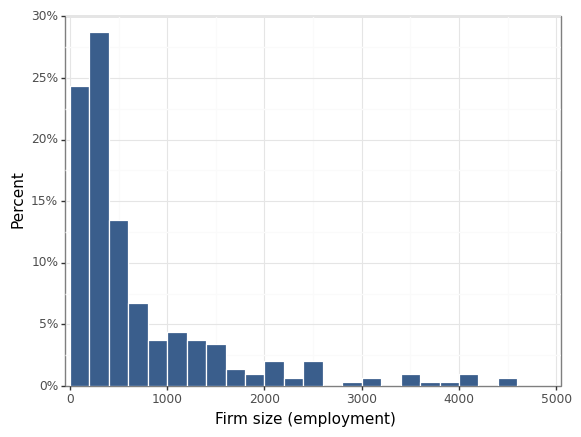

<ggplot: (674022211)>

In [8]:
(
    ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        fill=color[0], color="white", binwidth=200, boundary=0, closed="left"
    )
    + labs(x="Firm size (employment)", y="Percent")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
    )
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.3),
        breaks=seq(0, 0.5, by=0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


In [9]:
df.describe()


,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
count,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
mean,7977.316667,2013.0,29.390000,2.938519,2.815000,3.320667,2.746667,2.821111,2.783333,2.846667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,118.193890,0.0,5.684977,0.601059,0.959868,0.764934,0.705892,0.551878,1.039225,1.039273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7778.000000,2013.0,20.000000,1.277778,1.000000,1.000000,1.200000,1.166667,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7872.500000,2013.0,25.000000,2.555556,2.500000,2.800000,2.200000,2.500000,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,7973.000000,2013.0,30.000000,2.944444,3.000000,3.400000,2.800000,2.833333,3.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8083.500000,2013.0,34.000000,3.277778,3.500000,3.800000,3.200000,3.166667,4.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,8180.000000,2013.0,39.000000,4.611111,5.000000,5.000000,4.600000,4.333333,5.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#### NOT properly finished


In [11]:
df["lnemp"] = np.log(df.emp_firm)
df.lnemp.describe()


count    300.000000
mean       6.081850
std        0.992700
min        4.605170
25%        5.298317
50%        5.866432
75%        6.802395
max        8.517193
Name: lnemp, dtype: float64

(b) Natural log of number of employees

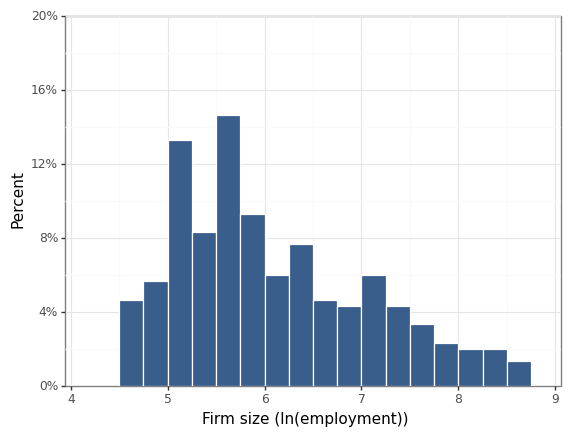

<ggplot: (674136805)>

In [12]:
(
    ggplot(df, aes(x="lnemp"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        color="white",
        fill=color[0],
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Firm size (ln(employment))", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.2),
        breaks=seq(0, 0.2, by=0.04),
        labels=percent_format(),
    )
    + theme_bw()
)


In [13]:
df["emp3bins"] = np.where(df.emp_firm < 200, 1, pd.np.nan)
df["emp3bins"] = np.where((df.emp_firm >= 200) & (df.emp_firm < 1000), 2, df.emp3bins)
df["emp3bins"] = np.where(df.emp_firm >= 1000, 3, df.emp3bins)


In [14]:
df.emp3bins.describe()


count    300.000000
mean       2.000000
std        0.693978
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: emp3bins, dtype: float64

In [15]:
df1 = pd.DataFrame(
    df.loc[:, ["emp3bins", "lean1"]].groupby(["emp3bins", "lean1"]).agg("size")
).reset_index()

df1.columns = ["emp3bins", "lean1", "Count"]

group_counts = df1.groupby("emp3bins").agg("sum")["Count"]

df1.loc[df1.emp3bins == 1, "Percent"] = round(
    df1.loc[df1.emp3bins == 1, "Count"] / group_counts[1], 5
)
df1.loc[df1.emp3bins == 2, "Percent"] = round(
    df1.loc[df1.emp3bins == 2, "Count"] / group_counts[2], 5
)
df1.loc[df1.emp3bins == 3, "Percent"] = round(
    df1.loc[df1.emp3bins == 3, "Count"] / group_counts[3], 5
)

df1 = df1.assign(
    lean1=pd.Categorical(
        df1["lean1"], categories=sorted(set(df["lean1"]), reverse=True)
    )
)


### Figure 4.3 Quality of specific management practices by three bins of firm size: conditional probabilities

(a) Lean management

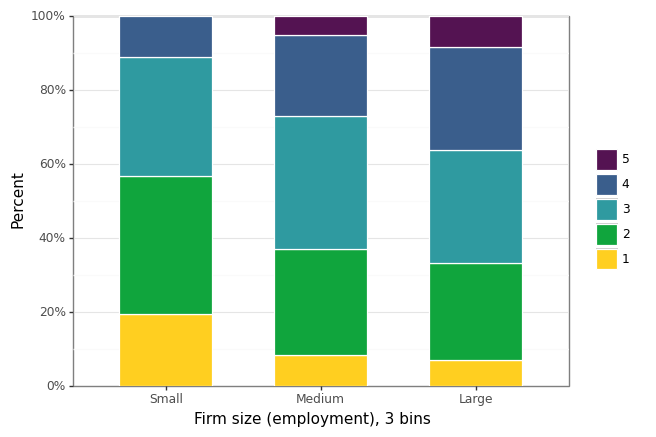

<ggplot: (674096984)>

In [16]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        breaks=seq(0, 1.1, by=0.2),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    + scale_fill_manual(
        values=(color[2], color[0], color[4], color[1], color[3]), name=" "
    )
    + scale_x_discrete(limits=[1, 2, 3], labels=["Small", "Medium", "Large"])
)


In [17]:
df1 = pd.DataFrame(
    df.loc[:, ["emp3bins", "perf2"]].groupby(["emp3bins", "perf2"]).agg("size")
).reset_index()

df1.columns = ["emp3bins", "perf2", "Count"]

group_counts = df1.groupby("emp3bins").agg("sum")["Count"]

df1.loc[df1.emp3bins == 1, "Percent"] = round(
    df1.loc[df1.emp3bins == 1, "Count"] / group_counts[1], 5
)
df1.loc[df1.emp3bins == 2, "Percent"] = round(
    df1.loc[df1.emp3bins == 2, "Count"] / group_counts[2], 5
)
df1.loc[df1.emp3bins == 3, "Percent"] = round(
    df1.loc[df1.emp3bins == 3, "Count"] / group_counts[3], 5
)

df1 = df1.assign(
    perf2=pd.Categorical(
        df1["perf2"], categories=sorted(set(df["perf2"]), reverse=True)
    )
)


(b) Performance tracking

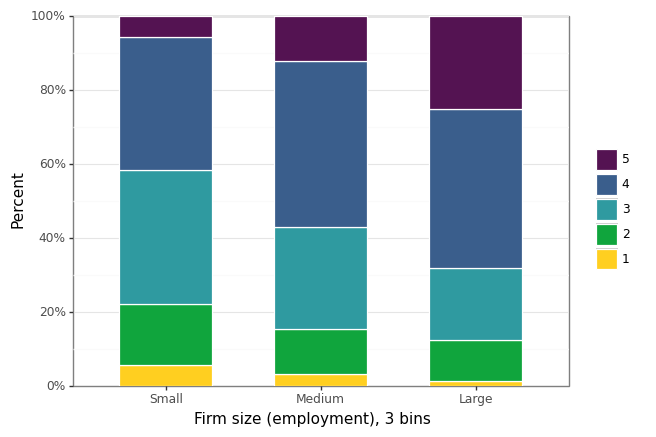

<ggplot: (674178139)>

In [18]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="perf2"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        breaks=seq(0, 1.1, by=0.2),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    + scale_fill_manual(
        values=(color[2], color[0], color[4], color[1], color[3]), name=" "
    )
    + scale_x_discrete(limits=[1, 2, 3], labels=["Small", "Medium", "Large"])
)


In [19]:
# Bin scatters avg score by employment bins

# Option 1: create 3 bins as defined by thresholds

# Summary

df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)


emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
1.0         100.0   197.0   145.597222   150.0    26.397108   72
2.0         200.0   994.0   413.153846   353.0   190.397552  156
3.0        1000.0  5000.0  2130.652778  1650.0  1178.115578   72

In [20]:
# Recode employee bins
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)


In [21]:
# Summary
df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)


emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
150.0       100.0   197.0   145.597222   150.0    26.397108   72
600.0       200.0   994.0   413.153846   353.0   190.397552  156
3000.0     1000.0  5000.0  2130.652778  1650.0  1178.115578   72

In [22]:
# Generate variables by mean
df1 = (
    df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
)
df1


,emp3bins,management_emp3bins
0,150.0,2.679784
1,600.0,2.943732
2,3000.0,3.185957


### Figure 4.4 Mean management quality score and firm size

(a) Three bins of employment

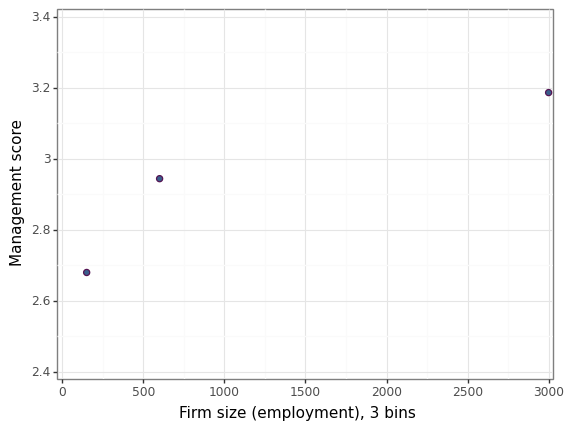

<ggplot: (674781254)>

In [23]:
(
    ggplot(df1, aes(x="emp3bins", y="management_emp3bins"))
    + geom_point(size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.4, 3.4), breaks=seq(2.4, 3.5, by=0.2)
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 3000), breaks=seq(0, 3001, by=500)
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + theme_bw()
)


In [24]:
df["emp10bins"] = pd.qcut(df["emp_firm"], 10)


In [25]:
# Summary
df_summary = (
    df.filter(["emp_firm", "emp10bins"])
    .groupby("emp10bins")
    .agg(["min", "max", "mean", "median", np.std, "size"])
)
df_summary


emp_firm                                              
                      min     max         mean  median         std size
emp10bins                                                              
(99.999, 144.5]     100.0   140.0   118.566667   118.0   11.595729   30
(144.5, 180.0]      145.0   180.0   163.625000   160.0   12.947007   40
(180.0, 229.4]      184.0   228.0   204.000000   200.0   10.223811   20
(229.4, 278.0]      230.0   275.0   250.533333   250.0   11.607766   30
(278.0, 353.0]      280.0   350.0   310.266667   300.0   23.090427   30
(353.0, 500.0]      356.0   500.0   432.222222   405.0   50.747617   36
(500.0, 670.0]      520.0   670.0   583.240000   600.0   49.321463   25
(670.0, 1110.0]     700.0  1100.0   905.793103   900.0  137.250912   29
(1110.0, 2000.0]   1150.0  2000.0  1515.294118  1500.0  289.735881   34
(2000.0, 5000.0]   2100.0  5000.0  3438.730769  3500.0  982.115006   26

In [26]:
# Recode
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})


In [27]:
df.filter(["emp_firm", "emp10bins"]).groupby("emp10bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)


emp_firm                                              
                        min     max         mean  median         std size
emp10bins                                                                
118.56666666666666    100.0   140.0   118.566667   118.0   11.595729   30
163.625               145.0   180.0   163.625000   160.0   12.947007   40
204.0                 184.0   228.0   204.000000   200.0   10.223811   20
250.53333333333333    230.0   275.0   250.533333   250.0   11.607766   30
310.26666666666665    280.0   350.0   310.266667   300.0   23.090427   30
432.22222222222223    356.0   500.0   432.222222   405.0   50.747617   36
583.24                520.0   670.0   583.240000   600.0   49.321463   25
905.7931034482758     700.0  1100.0   905.793103   900.0  137.250912   29
1515.2941176470588   1150.0  2000.0  1515.294118  1500.0  289.735881   34
3438.730769230769    2100.0  5000.0  3438.730769  3500.0  982.115006   26

In [28]:
# Generate variables by mean
df1 = (
    df.groupby("emp10bins")
    .agg(management_emp10bins=("management", "mean"))
    .reset_index()
    .assign(emp10bins = lambda x: x["emp10bins"].astype(int))
)
df1


,emp10bins,management_emp10bins
0,118,2.588889
1,163,2.736111
2,204,2.727778
3,250,2.968519
4,310,2.953704
5,432,2.956790
6,583,3.000000
7,905,2.994253
8,1515,3.096405
9,3438,3.410256


(b) Ten bins of employment

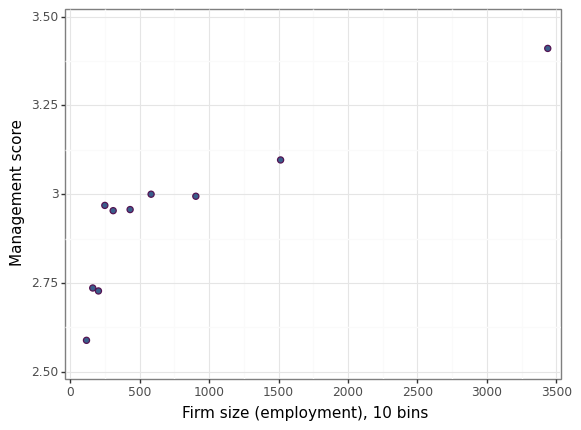

<ggplot: (674835399)>

In [29]:
(
    ggplot(df1, aes(x="emp10bins", y="management_emp10bins"))
    + geom_point(size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.5, 3.5), breaks=seq(2.5, 3.6, by=0.25)
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 3500), breaks=seq(0, 3501, by=500)
    )
    + labs(x="Firm size (employment), 10 bins", y="Management score")
    + theme_bw()
)


### Figure 4.5 The joint distribution of the management quality score and firm size

(a) By employment

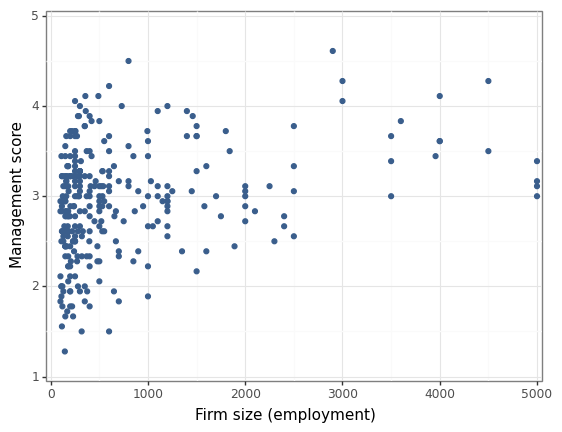

<ggplot: (674875537)>

In [30]:
(
    ggplot(df, aes(x="emp_firm", y="management"))
    + geom_point(color=color[0], size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1))
    + labs(x="Firm size (employment)", y="Management score")
    + theme_bw()
)


In [31]:
df["lnemp"] = np.log(df["emp_firm"])


(b) By log employment

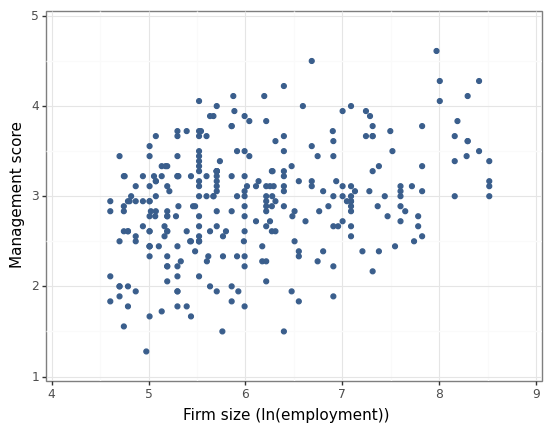

<ggplot: (674912531)>

In [32]:
(
    ggplot(df, aes(x="lnemp", y="management"))
    + geom_point(color=color[0], size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9), breaks=seq(4, 10, by=1))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1))
    + labs(x="Firm size (ln(employment))", y="Management score")
    + theme_bw()
)


### Figure 4.6 Conditional summary statistics of the management score by bins of firm size

In [33]:
df = df.replace({"emp3bins": {150: "Small", 600: "Medium", 3000: "Large"}})


Box plots

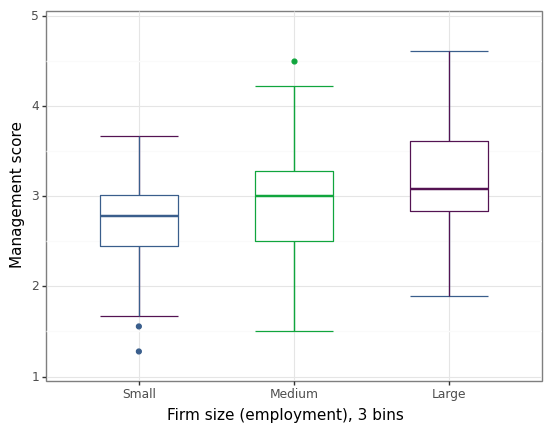

<ggplot: (674952509)>

In [34]:
(
    ggplot(
        df,
        aes(
            x="pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))",
            y="management",
            group="emp3bins",
        ),
    )
    + stat_boxplot(
        geom="errorbar",
        width=0.5,
        color=(color[0], color[1], color[2]),
        size=0.5,
        na_rm=True,
    )
    + geom_boxplot(
        color=(color[0], color[1], color[2]),
        #fill=(color[1], color[0], color[2]),
        size=0.5,
        width=0.5,
        #alpha=0.3,
        na_rm=True,
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 1))
    + theme_bw()
)


Violin plot

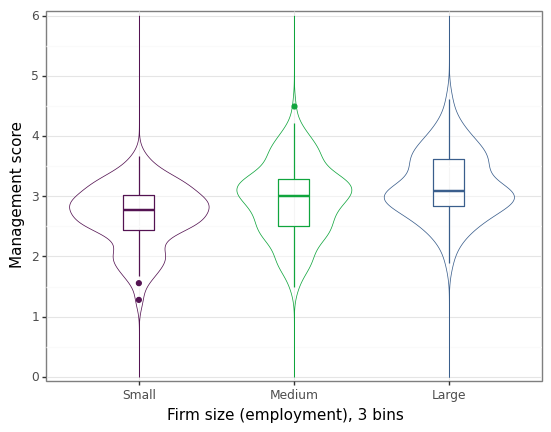

<ggplot: (674168811)>

In [35]:
(
    ggplot(
        df,
        aes(
            x="pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))",
            y="management",
            color="emp3bins",
            group="emp3bins",
        ),
    )
    + geom_violin(size=0.3, alpha=0.5, trim=False, show_legend=False, na_rm=True)
    + geom_boxplot(size=0.5, width=0.2, alpha=0.3, na_rm=True)
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_color_manual(values=(color[0], color[1], color[2]))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 6, 1))
    + guides(fill=False, color=False)
    + theme_bw()
)

In [36]:
# Correlation
df["management"].corr(df["emp_firm"])


0.30199539572479067

In [37]:
# by industry
df["industry_broad"] = pd.np.nan
df.loc[df.sic <= 21, "industry_broad"] = "food_drinks_tobacco"
df.loc[
    ((df["sic"] >= 22) & (df["sic"] <= 23)) | (df["sic"] == 31), "industry_broad"
] = "textile_apparel_leather_etc"
df.loc[(df.sic >= 24) & (df.sic <= 27), "industry_broad"] = "wood_furniture_paper"
df.loc[(df.sic >= 28) & (df.sic <= 30), "industry_broad"] = "chemicals_etc"
df.loc[(df.sic >= 32) & (df.sic < 35), "industry_broad"] = "materials_metals"
df.loc[(df.sic >= 35) & (df.sic < 37), "industry_broad"] = "electronics"
df.loc[df.sic == 37, "industry_broad"] = "auto"
df.loc[df.sic >= 38, "industry_broad"] = "other"


In [38]:
df.industry_broad.value_counts()


chemicals_etc                  69
materials_metals               50
textile_apparel_leather_etc    38
wood_furniture_paper           37
electronics                    36
food_drinks_tobacco            34
auto                           26
other                          10
Name: industry_broad, dtype: int64

In [39]:
# Correlation
df.groupby("industry_broad")["management", "emp_firm"].corr().iloc[0::2, -1]


industry_broad                         
auto                         management    0.502322
chemicals_etc                management    0.053380
electronics                  management    0.282000
food_drinks_tobacco          management    0.052144
materials_metals             management    0.320921
other                        management    0.628398
textile_apparel_leather_etc  management    0.360877
wood_furniture_paper         management    0.294981
Name: emp_firm, dtype: float64

In [40]:
df.filter(["management", "industry_broad"]).loc[
    lambda x: ~x["industry_broad"].isnull()
].groupby("industry_broad").agg(
    Min=("management", min),
    Max=("management", max),
    SD=("management", np.std),
    Median=("management", "median"),
    n=("management", "size"),
)


,Min,Max,SD,Median,n
industry_broad,,,,,
auto,2.277778,4.277778,0.553367,3.194445,26
chemicals_etc,1.277778,4.111111,0.550176,3.000000,69
electronics,1.500000,4.500000,0.693034,3.111111,36
food_drinks_tobacco,1.888889,4.222222,0.525753,2.833333,34
materials_metals,1.555556,4.277778,0.564557,2.861111,50
other,1.777778,4.611111,0.844087,3.555556,10
textile_apparel_leather_etc,1.777778,4.000000,0.567371,2.777778,38
wood_furniture_paper,1.722222,3.555556,0.555556,2.833333,37


In [41]:
df.filter(["emp_firm", "industry_broad"]).loc[
    lambda x: ~x["industry_broad"].isnull()
].groupby("industry_broad").agg(
    Min=("emp_firm", min),
    Max=("emp_firm", max),
    SD=("emp_firm", np.std),
    Median=("emp_firm", "median"),
    n=("emp_firm", "size"),
)


,Min,Max,SD,Median,n
industry_broad,,,,,
auto,130.0,5000.0,1625.103843,500.0,26
chemicals_etc,116.0,2000.0,465.980775,356.0,69
electronics,115.0,5000.0,1126.786821,295.0,36
food_drinks_tobacco,120.0,2400.0,665.626102,471.0,34
materials_metals,100.0,5000.0,1151.436836,335.0,50
other,200.0,2900.0,867.247043,350.0,10
textile_apparel_leather_etc,110.0,4000.0,899.413044,350.0,38
wood_furniture_paper,100.0,3500.0,855.610261,300.0,37


In [42]:
# Correlation
cor = (
    pd.DataFrame(
        df.groupby("industry_broad")["management", "emp_firm"].corr().iloc[0::2, -1]
    )
    .reset_index()
    .drop(["level_1"], axis=1)
)
cor.columns = ["industry_broad", "COR"]
cor = cor.set_index("industry_broad")


In [43]:
table41 = (
    df.filter(["emp_firm", "industry_broad", "management"])
    .groupby("industry_broad")
    .agg(Mean=("management", "mean"), Obs=("management", "size"))
)
table41["cor"] = cor.COR


In [44]:
table41.index = [
    "Auto",
    "Chemicals",
    "Machinery, equipment, electronics",
    "Food, drinks, tobacco",
    "Materials, metals",
    "Textile, apparel, leather",
    "Wood, furniture, paper",
    "Other",
]
table41.round(2)


,Mean,Obs,cor
Auto,3.25,26,0.50
Chemicals,2.97,69,0.05
"Machinery, equipment, electronics",3.15,36,0.28
"Food, drinks, tobacco",2.87,34,0.05
"Materials, metals",2.85,50,0.32
"Textile, apparel, leather",3.29,10,0.63
"Wood, furniture, paper",2.77,38,0.36
Other,2.72,37,0.29


In [45]:
last_row = (
    table41.groupby(lambda _: True)
    .agg(Mean=("Mean", "mean"), Obs=("Obs", "sum"), cor=("cor", "mean"))
    .reset_index(drop=True)
)
last_row.index = ["All"]


In [46]:
table41 = table41.append(last_row)


In [47]:
table41 = table41.loc[:, ["cor", "Mean", "Obs"]].reset_index()
table41.columns = [
    "Industry",
    "Management - employment correlation",
    "Management score",
    "Observations",
]


In [48]:
table41.round(2)


,Industry,Management - employment correlation,Management score,Observations
0,Auto,0.50,3.25,26
1,Chemicals,0.05,2.97,69
2,"Machinery, equipment, electronics",0.28,3.15,36
3,"Food, drinks, tobacco",0.05,2.87,34
4,"Materials, metals",0.32,2.85,50
5,"Textile, apparel, leather",0.63,3.29,10
6,"Wood, furniture, paper",0.36,2.77,38
7,Other,0.29,2.72,37
8,All,0.31,2.98,300



## Chapter 03 plots
---------------------------------------------------------------

In [49]:
df2 = df.filter(["emp3bins", "management"]).loc[lambda x: x["emp3bins"] == "Small"]


In [50]:
q1 = np.quantile(df2["management"], 0.25)
q2 = np.quantile(df2["management"], 0.5)
q3 = np.quantile(df2["management"], 0.75)
iqr = q3 - q1
ub = max(df2.loc[df2["management"] < q3 + 1.5 * iqr, "management"])
lb = min(df2.loc[df2["management"] >= q1 - 1.5 * iqr, "management"])
out_lb = min(df2["management"])
min = min(df["management"])
max = max(df["management"])


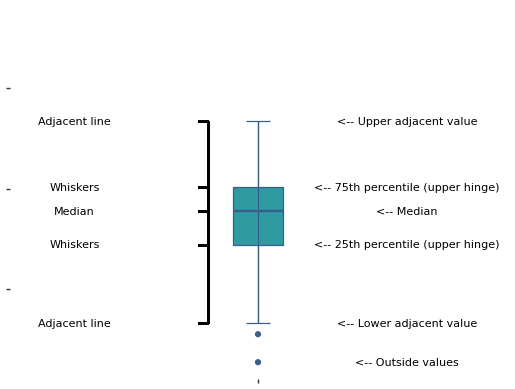

<ggplot: (675185695)>

In [51]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_boxplot(
        color=color[0], fill=color[4], size=0.5, width=0.1, alpha=0.5, na_rm=True
    )
    + stat_boxplot(geom="errorbar", width=0.05, color=color[0], size=0.5, na_rm=True)
    + scale_y_continuous(limits=(min, max))
    + annotate("text", x=1.3, y=ub, label="<-- Upper adjacent value", size=8)
    + annotate("text", x=1.3, y=q3, label="<-- 75th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=q2, label="<-- Median", size=8)
    + annotate("text", x=1.3, y=q1, label="<-- 25th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=lb, label="<-- Lower adjacent value", size=8)
    + annotate("text", x=1.3, y=out_lb, label="<-- Outside values", size=8)
    + annotate("text", x=0.63, y=ub, label="Adjacent line", size=8)
    + annotate("text", x=0.63, y=q3, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=q2, label="Median", size=8)
    + annotate("text", x=0.63, y=q1, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=lb, label="Adjacent line", size=8)
    + geom_segment(aes(x=0.9, y=lb, xend=0.9, yend=ub))
    + geom_segment(aes(x=0.88, y=lb, xend=0.9, yend=lb))
    + geom_segment(aes(x=0.88, y=q1, xend=0.9, yend=q1))
    + geom_segment(aes(x=0.88, y=q2, xend=0.9, yend=q2))
    + geom_segment(aes(x=0.88, y=q3, xend=0.9, yend=q3))
    + geom_segment(aes(x=0.88, y=ub, xend=0.9, yend=ub))
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        # axis_ticks_x=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        # axis_ticks_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)


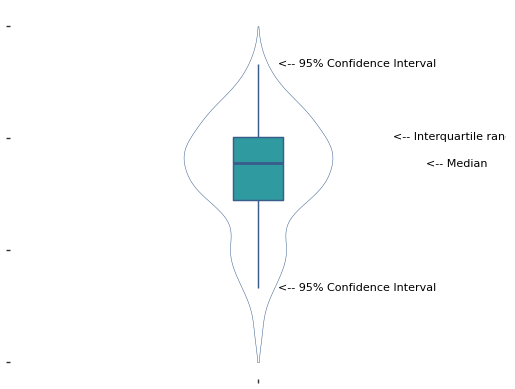

<ggplot: (675216418)>

In [52]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_violin(
        size=0.2,
        width=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
        color=color[0],
        alpha=0.3,
    )
    + geom_boxplot(
        color=color[0],
        fill=color[4],
        size=0.6,
        width=0.1,
        alpha=0.5,
        na_rm=True,
        outlier_shape="",
    )
    + annotate("text", x=1.2, y=ub, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.2, y=lb, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.4, y=q3, label="<-- Interquartile range", size=8)
    + annotate("text", x=1.4, y=q2, label="<-- Median", size=8)
    + ylim(1, 4)
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        # axis_ticks_x=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        # axis_ticks_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)
